In [0]:
import numpy as np

# 의류 이미지를 분류 합니다.

앞에서 만든 Multiclassnetwork 클래스를 사용하여 '의류 이미지 분류하기'라는 다중 분류 문제를 해결 해 보겠습니다. 이번 실습 부터는 패션 MNIST 데이터를 텐서플로에서 불러와 사용합니다.

### 1.텐서플로 설치 및 임포트 하기

In [1]:
!pip install tensorflow-gpu==2.0.0-rc1 # 구글 콜렙은 1.15버전이라 2.0 버전으로 업그레이드 해야합니다

     |████████████████████████████████| 380.5MB 41kB/s 
     |████████████████████████████████| 501kB 55.9MB/s 
     |████████████████████████████████| 4.3MB 48.1MB/s 


In [0]:
import tensorflow as tf

### 2.텐서플로 버전 확인하기

In [3]:
tf.__version__

'2.0.0-rc1'

### 3.패션 MNIST데이터 세트 불러오기

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### 4.훈련 세트의 크기 확인하기

In [47]:
print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


![샘플](https://lh3.googleusercontent.com/y14JSSOZEjw7Nc89hPi2QWT1vnR8TCtgunFGGzl5i9Q2Fg7zjd8U8D01nnMHsIwye2lBYXc29eR1ZNurz3Gpau-AcltgMmKpNKdFSpo_Kotry2oND3TBBLgBH1tkozobBn06F1FVNJhUWzTJAaTwDoV4d5m0RAKxCO7WQzJkN6JiozO1jPqazcZhIVxPtfUX4_rLcPrCnNK4f5nkXdqirSSA1nu4f8nC-ilFFzlHh0a1Q7Qx37UiGNrDHid6yzpdNe2qM1_K8EQOSZlextsIAPP3NzWg7MyDo5MR2Gs1j38fudGCTiSuM6-d93oJnLIFbMxEPtDhwqjM-n6WwID5BIwm0MDiSJh2XAPV36cAupuG3HAmZZqs7lnJY3obgMjyXpjQoCza-IWdv7pHuOFpDo2fwGRpzoej4woddpWGVbMlOBSHoasCgo2g8_zEkmavBYyY4Q-yCh_mH__xYfoqYC2IpIGQir-DKZU-pm_mTMqqbS2dNVx1uyF-Ad2wwMV30LqhpTLpJc83OW0v1GPi5fqIv2vuD3IhdB2BAdz9KFX3GrMyEqgf2NrTQVqgGyB_81oCYDnLgMy5wXbTejPntfyVPLvLn4G4h4atKINxrE23S06PO_zi3Q2DG6sLDCIgAPEDWFkhUaVizxuKlI-p7dCip7F9uOBAJfzNC0kuaghV80NQ=w514-h625-no)

### 5.imgshow()함수로 샘플 이미지 확인하기

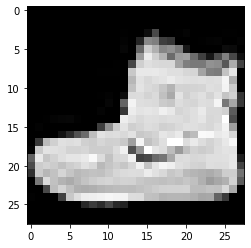

In [46]:
import matplotlib.pyplot as plt
plt.imshow(x_train_all[0], cmap='gray') # imshow() 함수는 넘파이 배열을 받아 이미지를 그리는데 cmap='gray' 이므로 배열 원소값이 0에 가까울수록 검게 그려집니다
plt.show()

### 6.타깃의 내용과 의미 확인하기

타깃의 크기는 60,000개의 요소를 가진 1차원 배열인데 이중 가장 앞에 있는 데이터 10개만 출력해보겠습니다

In [0]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [0]:
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트', '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']
# 순서대로 0부터 9까지의 의미 

In [8]:
print(class_names[y_train_all[0]])

앵클부츠


### 7.타깃 분포 확인하기

훈련 세트와 검증 세트로 나누기 전 훈련 세트의 타깃값들이 고르게 분포되어있는지 확인해보겠습니다

In [12]:
np.bincount(y_train_all)  # 배열에 있는 정수값의 등장 횟수를 세어 정수값에 해당하는 인덱스 위치에 저장합니다

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

###8.훈련 세트와 검증 세트 고르게 나누기

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

검증 세트의 레이블이 잘 나눠졌는지 확인

In [15]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800])

In [16]:
np.bincount(y_val)

array([1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200])

### 9.입력 데이터 정규화 하기

이미지 데이터는 픽셀마다 0 ~ 255사이 값을 가지므로 255로 나누어 0~1 사이로 맞춥니다

In [0]:
x_train = x_train / 255
x_val = x_val / 255

### 10.훈련세트와 검증세트의 차원 변경하기

기존 28 * 28 크기의 2차원 배열을 reshape() 메서드를 사용하여 1차원 배열의 샘플로 바꿉니다

In [0]:
x_train = x_train.reshape(-1, 784) # (-1,784)는 784열로 맞춘다는 뜻이다
x_val = x_val.reshape(-1, 784)

In [24]:
print(x_train.shape, x_val.shape)

(48000, 784) (12000, 784)


![대체 텍스트](https://github.com/JungMinNoh/jungminnoh/blob/master/7-8.jpg?raw=true)

###타깃 데이터를 준비하고 다중 분류 신경망을 훈련합니다

MNIST 데이터세트는 10개의 클래스로 구성되어 있으므로 출력 뉴런의 개수도 10개가 되어야 합니다. 하지만 y_train, y_val에 저장된 값들은 0 ~ 9 사이의 정수값 하나로 10개의 출력 뉴런에 대응되지 않습니다. 즉, 이 타깃 데이터를 출력 뉴런의 갯수에 맞게 변형해야 합니다.

### 1. 타깃을 원-핫 인코딩(one-hot encoding)으로 변환하기 

정수값에 해당하는 원소는 1, 나머지 원소는 0으로 하여 10개의 원소를 가진 배열을 만드는 것입니다. 

![대체 텍스트](https://lh3.googleusercontent.com/uWKy_lt7XFZ4LXwmno2FJG55doPC3TInc8S2HOFB3vkOXMIdYbKKVYlbYqWlVkrdMB3ecSP53jd3FJRC8wmhxdH3j8k3vz8Aib6wN-RTnJWbKG7JGVvrhrD2qaafBR0fj56frHz_SVKjr89rTgCIK3nSNu6PpRDHynLgtOPlHnVfXKShR91hvGO8NfcmBlp_MxsiDTWs7H9hz9SZWYI2U5BKSGiz-e6-Rrereq3Hng2zGMS6x1ot9ez7zjSNrA23WqSHw78ZzHgImhGbH2Lk50E_sgOmhTalx9kJjRM3PAnr_XQlRcciM-Xhsx13jHbEpz2b7Ynjd_X69iqtpCdeWh4zqaQ0HMN0-2K1eEVtKbcH0wkVyNX4kuY4u8hT6dHZox2u77h3MUNYI90p3TH0qaeyBJzpVpma5PfPVmivfxDRykmz4sLd16d_0mMJqFMiYeF1DxjpuRaGEH4IOCdspolkxm5wU59DkVEh0LDc6MsjkeycR37TJH3IQsUJOs9ETyWaJCMuNrmoRIp8ySvLuP0zkgM6B4OBq_rRR1V8uN0hzCTpZlvkS5MVpAsMb57s9wYf7g6OpT-1Dhmk1Zaaer1yjd_9WFob8cxlX803hI200ZR0_Vy7NeOnZ0XdKKrRNO59D8jrU3VvWmiepUKUhOrJ_jvjt1c5vebxASbVMvmO0Cg5=w834-h625-no)

![대체 텍스트](https://lh3.googleusercontent.com/gW1mxY5yGXqeyWnXv-ydwiJKOlUAfy5WpbVTly12yj3jsqqPYOf7vjjqEtzgt1j2AEpOs4WXSNJfhf1DnlzdJ3vnWfO3X1zsTxcJgSCD0nssCCRbLne3nuXuTO6ifpw8qmSqVZEg8DG3EgTEDIWJueIPF1n8wfEcXUqyRPaw2R5S1SuCMIjwa3OmE6YU9wpPyS1PVu_9Jn_-Q4x86KuCl9c1yIp9dzXgKCUjvF2ISDFRPmldpAAHcipkmfaO4UD7FFDViUMq8107cKd_ZH_xELVuVjxJ9ozd6XK4fRKL9zIWbJLIsIFcn6eauOp8p2qgwFr5fF3gO8s22bgQtNmyjmd7ywkJsjq0kvf0yR3A-7SP8SgkqxMVOUkKSS2qRwCGIpq3JxMRn9IvNpN_Hyxg3oRsnm2Tg0pchvRioZ7lRigWRcv6_HRc_b6zBsnDAaIW4DYiVB-PsxGQeQMGHHWLoNkXL7-vmgHqsiXlubnSNmNH9q5JH3Y8mnZa6TI-f_tw4BXrtyrFek4IpL1Nvtqxmd0dpfTNfpDg8YkqXkK8pHI47wz7gjWfvADjSTdgAbHUgvNtZvVbXIBcDZ1GrH0Qifhq0zl-Z_Hq5TRY7T5rH0RQ5zDlQWF6MFBBqoeYrGxOyBmzYsVLOHPJRSuSMMUppXdLnUpxWulzcEOtOPuSXrhij1gb=w834-h625-no)

###3. to_catagorical 함수 사용해 원-핫 인코딩하기


In [39]:
tf.keras.utils.to_categorical([0,1,3]) # 1행은 0, 2행은 1, 3행은 3에 해당하는 값

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [0]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [49]:
print(y_train_encoded.shape, y_val_encoded.shape)

(48000, 10) (12000, 10)


In [51]:
print(y_train[0], y_train_encoded[0]) # 0~9까지 나타낸다

6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


###4. MultiClassNetwork 클래스로 다중 분류 신경망 훈련하기


In [52]:
fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=40)

NameError: ignored

###5. 훈련 손실, 검증 손실 그래프와 훈련 모델 점수 확인하기

In [53]:
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

NameError: ignored

In [54]:
fc.score(x_val, y_val_encoded)

NameError: ignored